In [1]:
using HiQGA

# Data loading

[ Info: reading /scratch/ns59/HiQGA.jl/ASEG_Hobart_Workshop_2024/UDF_data/twolines.dat
[ Info: reading /scratch/ns59/HiQGA.jl/ASEG_Hobart_Workshop_2024/UDF_data/electronics_halt.jl
[ Info: read 274 out of 2600
[ Info: read 559 out of 2600
[ Info: read 846 out of 2600
[ Info: read 1131 out of 2600
[ Info: read 1417 out of 2600
[ Info: read 1703 out of 2600
[ Info: read 1990 out of 2600
[ Info: read 2275 out of 2600
[ Info: read 2562 out of 2600


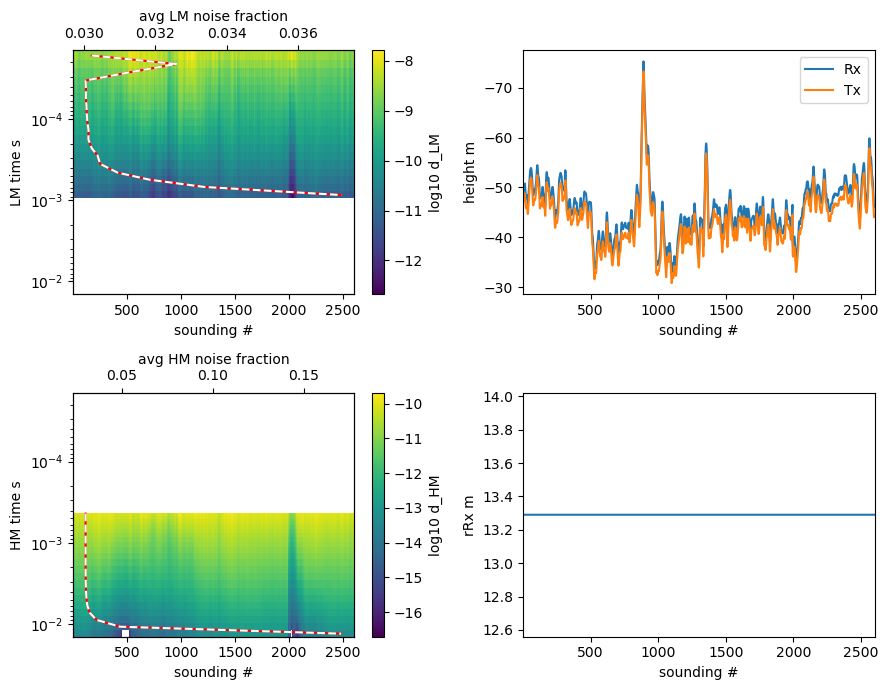

In [2]:
# info to read data
# datafile
fname_dat = "/scratch/ns59/HiQGA.jl/ASEG_Hobart_Workshop_2024/UDF_data/twolines.dat"
# electronics file
fname_specs_halt = "/scratch/ns59/HiQGA.jl/ASEG_Hobart_Workshop_2024/UDF_data/electronics_halt.jl"
# column numbers from hdr file
X, Y, Z = 1, 2, 3
fid = 73
linenum = 72
frame_height = 4
frame_dx = 5
frame_dy = 6
frame_dz = 7
LM_Z = [16, 33]
HM_Z = [49, 71]
relerror = false
units = 1e-12
# load the data
include(fname_specs_halt)
soundings = transD_GP.SkyTEM1DInversion.read_survey_files(;fname_dat = fname_dat,
								lowpassfcs, LM_times, HM_times, LM_ramp, HM_ramp, 
								LM_noise, HM_noise, rTx,
								LM_Z             = LM_Z,
								HM_Z             = HM_Z,
								frame_height     = frame_height,
								frame_dz         = frame_dz,
								frame_dy         = frame_dy,
								frame_dx         = frame_dx,
								X                = X,
								Y                = Y,
								Z                = Z,
								fid              = fid,
								units            = units,
								relerror         = relerror,
								linenum          = linenum,
								startfrom        = 1,
								skipevery        = 1, # all soundings
								dotillsounding   = nothing,
								makeqcplots      = true);

# McMC options

In [3]:
# same for all soundingss
nsamples = 200001
nchainspersounding = 5
ppn = 48
@assert mod(ppn, nchainspersounding+1) == 0
zfixed   = [-1e5]
ρfixed   = [1e12]
zstart = 0.0
showgeomplot = true
plotfield = true
# extension of each layer thickness by, min thickness
extendfrac, dz = 1.06, 1.5
nlayers = 50
ρbg = 10. # linear halfspace resistivity for sanity check plot
useML = false # Maximum likelihood noise or not
# make transD options
nmin, nmax = 2, 40
K = transD_GP.GP.OrstUhn() # Kind of GP Kernel
fbounds = [-1 3] # resistivity in log 10
sdpos = 0.05 # fraction of nlayers
sdprop = 0.05 # fraction of fbounds
sddc = 0.01 # fraction of fbounds
λ, δ = [2], 0.1 # length scale in layers, nuggget in log10 ohm-m
save_freq = 50 # How often to save
Tmax = 2.50 # Max annealing for parallel tempering
nchainsatone = 1 # chains at T=1.0
restart = false # if restarting a run
using Random; Random.seed!(2)

TaskLocalRNG()

# Plot a random sounding and background response

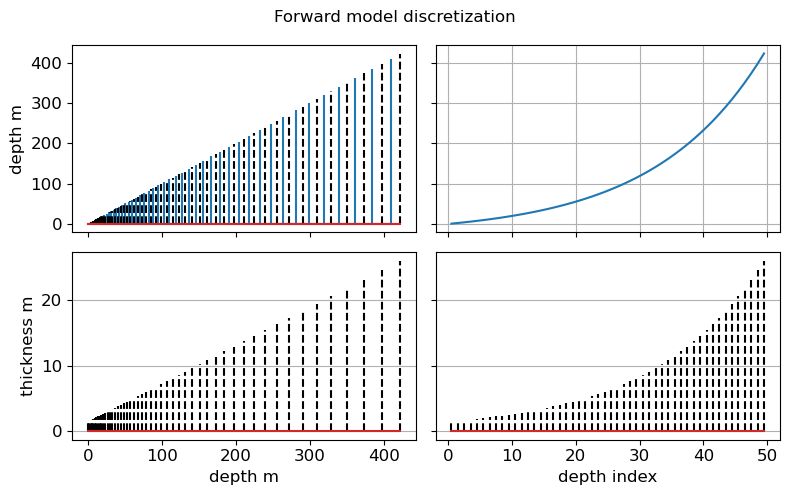

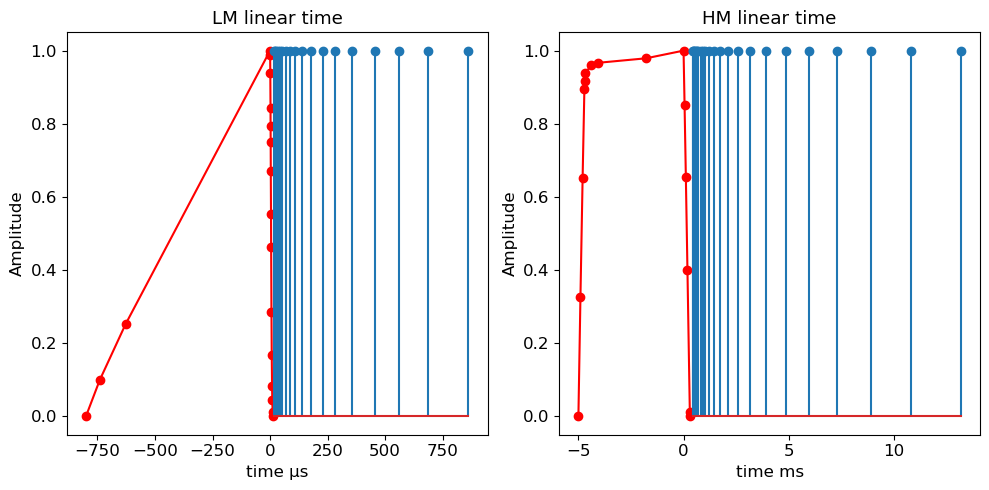

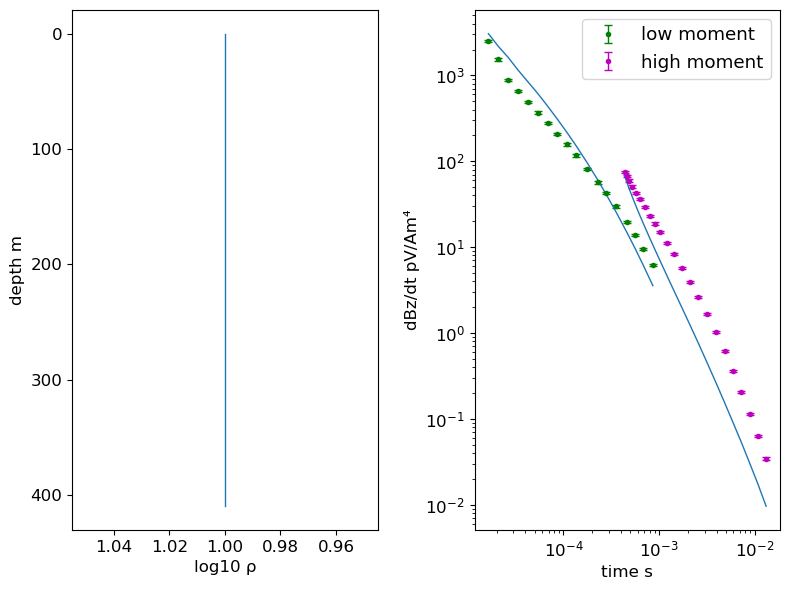

In [4]:
aem, opt, zall = transD_GP.makeAEMoperatorandoptions(
                            soundings[rand(1:length(soundings))];
                            zfixed = zfixed,
                            ρfixed = ρfixed,
                            zstart = zstart,
                            extendfrac = extendfrac,
                            dz = dz,
                            ρbg = ρbg,
                            nlayers = nlayers,
                            useML = useML,
                            nmin = nmin,
                            nmax = nmax,
                            K = K,
                            sdpos = sdpos,
                            sdprop = sdprop,
                            sddc = sddc,
                            fbounds = fbounds,
                            save_freq = save_freq,
                            showgeomplot = showgeomplot,
                            plotfield,
                            λ = λ,
                            δ = δ, restart);

# Plot results

idspec = idx[doesmatch] = [200, 1700]


[ Info: 100401
[ Info: X, Y = 154579.83, 6.47421801e6
[ Info: X, Y = 141939.62, 6.49232082e6
┌ Warning: rho_low_line_100401_summary.txt exists, reading stored values
└ @ HiQGA.transD_GP.AEMnoNuisanceMcMCInversionTools /opt/julia/packages/HiQGA/9eKJ1/src/AEMnoNuisanceMcMCInversionTools.jl:118
[ Info: 100502


idspec = idx[doesmatch] = [300]


[ Info: X, Y = 157240.61, 6.47916356e6
┌ Warning: rho_low_line_100502_summary.txt exists, reading stored values
└ @ HiQGA.transD_GP.AEMnoNuisanceMcMCInversionTools /opt/julia/packages/HiQGA/9eKJ1/src/AEMnoNuisanceMcMCInversionTools.jl:118


idspec = idx[doesmatch] = [200, 1700]


[ Info: 100401
[ Info: X, Y = 154579.83, 6.47421801e6
[ Info: X, Y = 141939.62, 6.49232082e6
[ Info: Sounding number: 200
[ Info: Number of chains is 5
[ Info: Number of chains is 5
[ Info: McMC has run for 200001 iterations
[ Info: obtained models 49951 to 200001 at T=1.0
[ Info: Number of chains is 5
[ Info: McMC has run for 200001 iterations
[ Info: obtained models 49951 to 200001 at T=1.0
[ Info: Sounding number: 1700
[ Info: Number of chains is 5
[ Info: Number of chains is 5
[ Info: McMC has run for 200001 iterations
[ Info: obtained models 49951 to 200001 at T=1.0
[ Info: Number of chains is 5
[ Info: McMC has run for 200001 iterations
[ Info: obtained models 49951 to 200001 at T=1.0


idspec = idx[doesmatch] = [300]


[ Info: 100502
[ Info: X, Y = 157240.61, 6.47916356e6
[ Info: Sounding number: 300
[ Info: Number of chains is 5
[ Info: Number of chains is 5
[ Info: McMC has run for 200001 iterations
[ Info: obtained models 49951 to 200001 at T=1.0
[ Info: Number of chains is 5
[ Info: McMC has run for 200001 iterations
[ Info: obtained models 49951 to 200001 at T=1.0


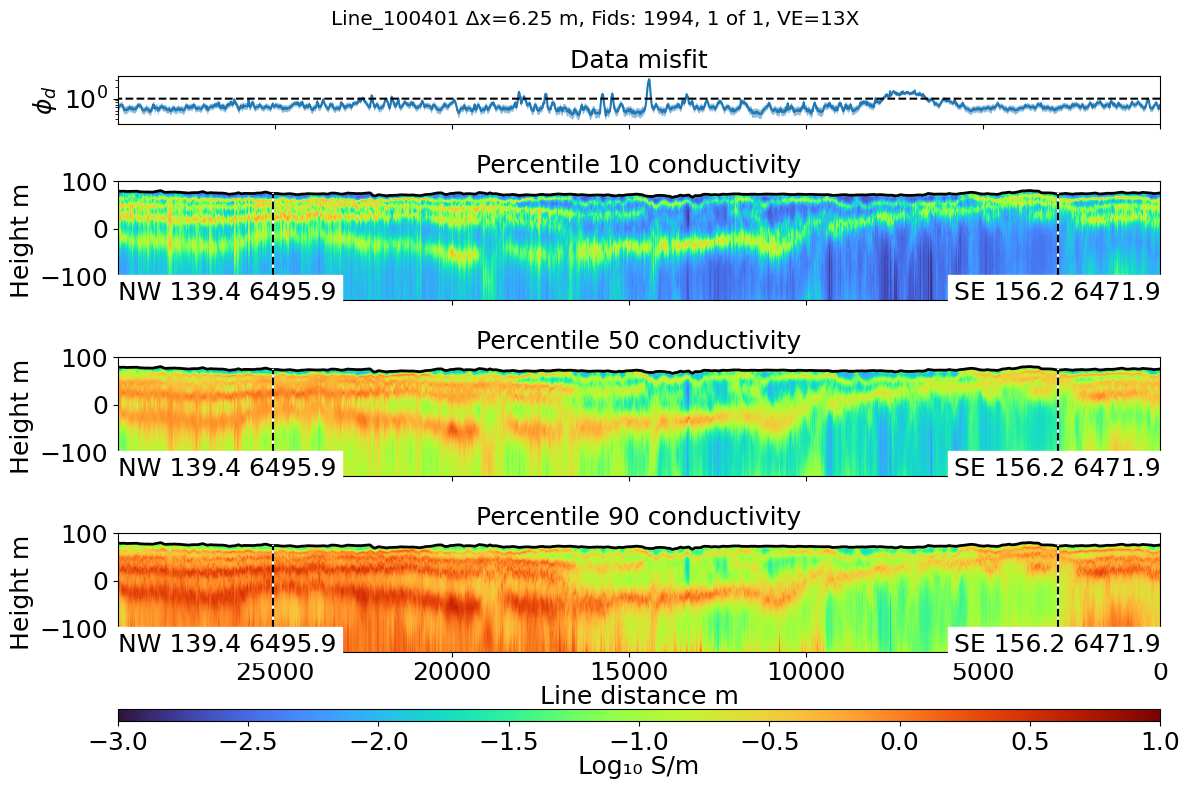

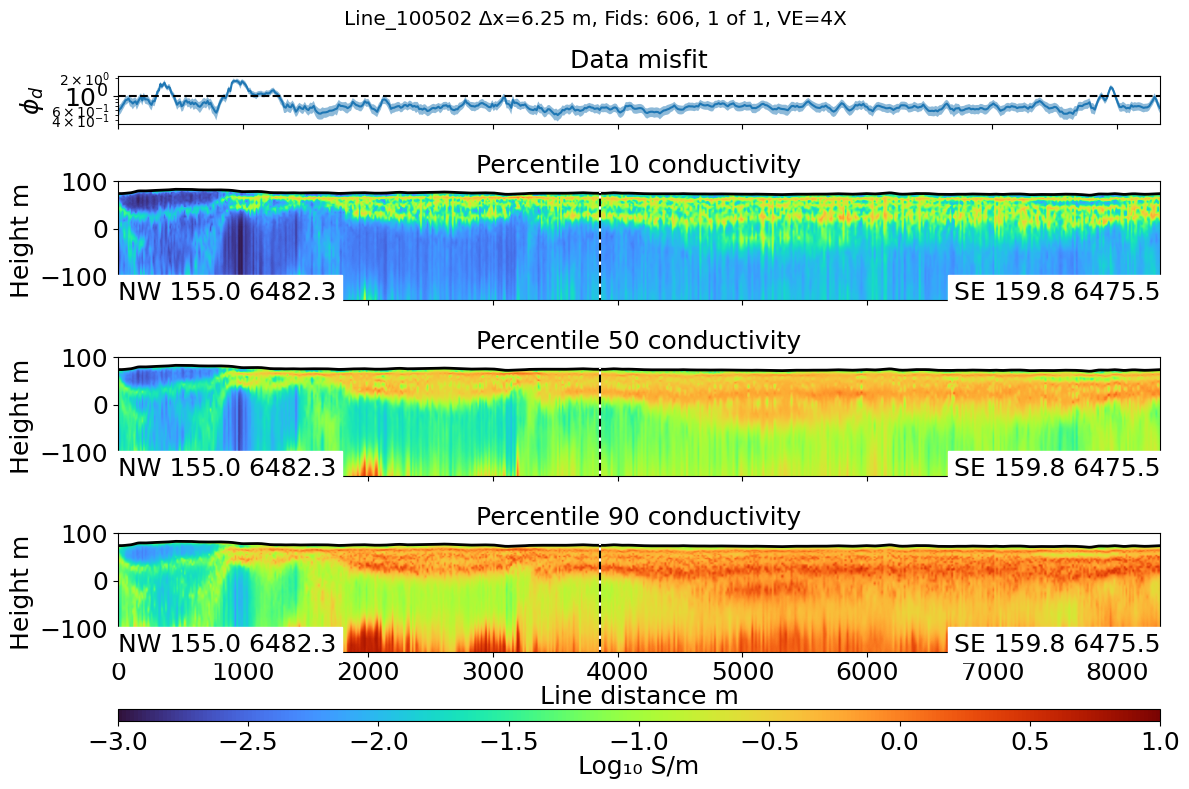

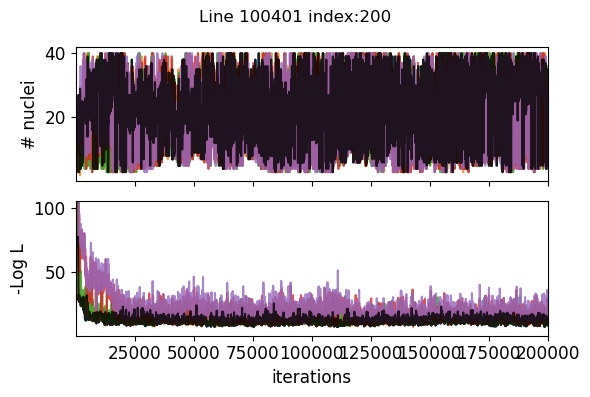

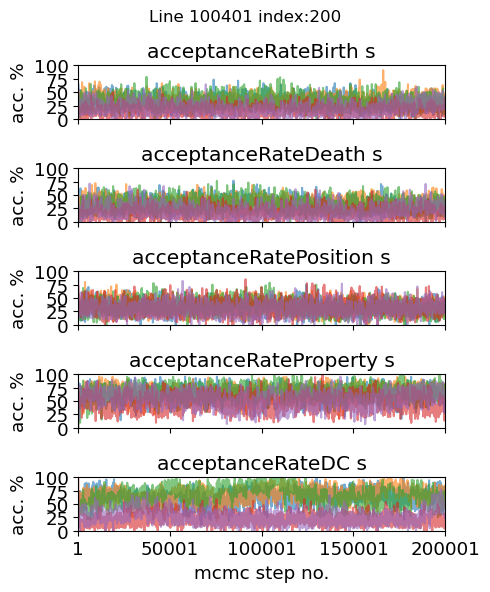

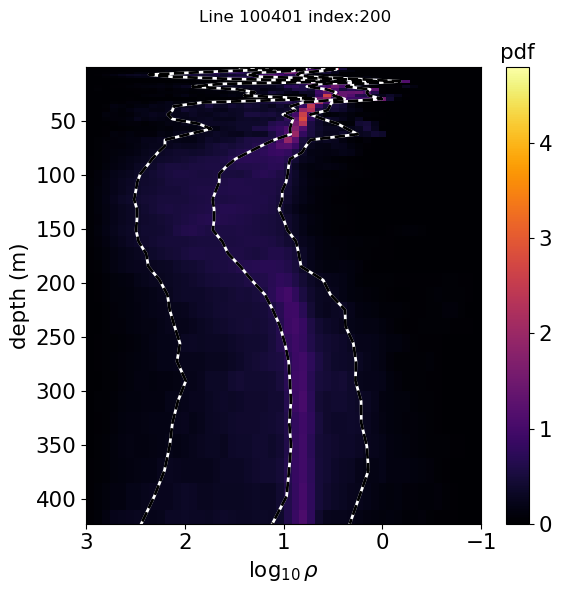

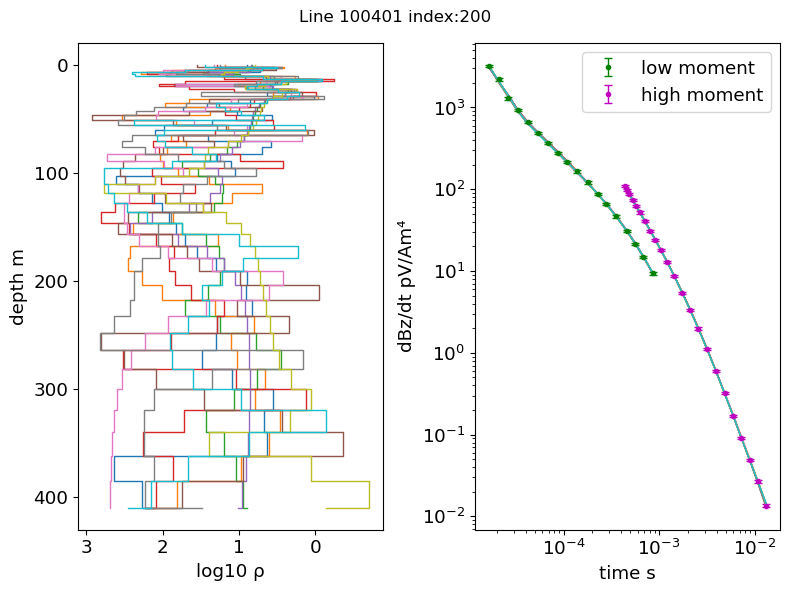

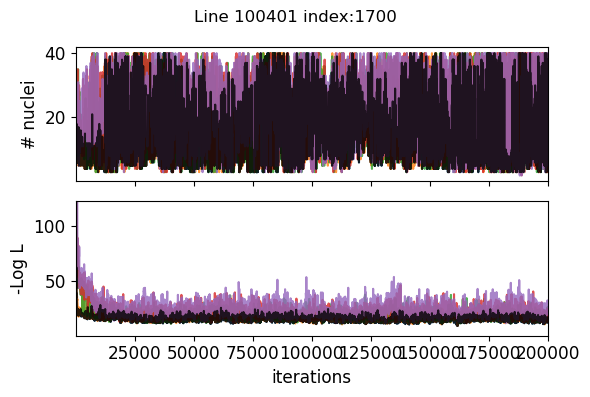

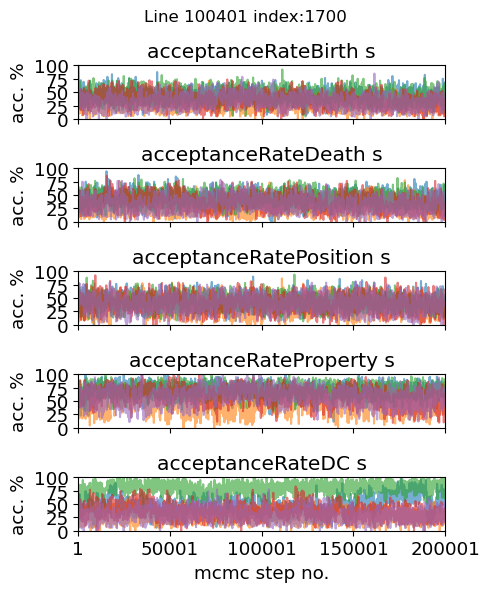

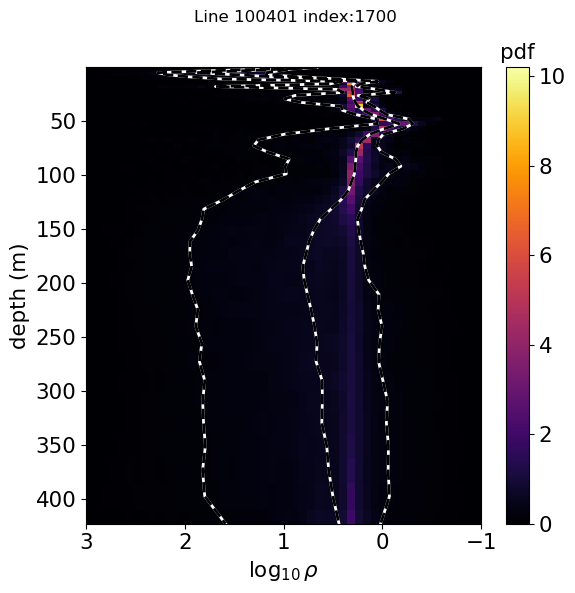

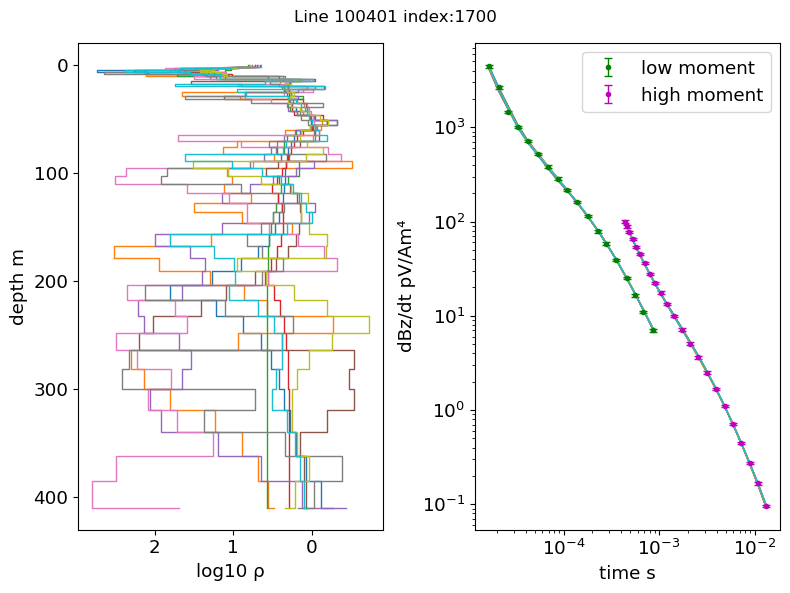

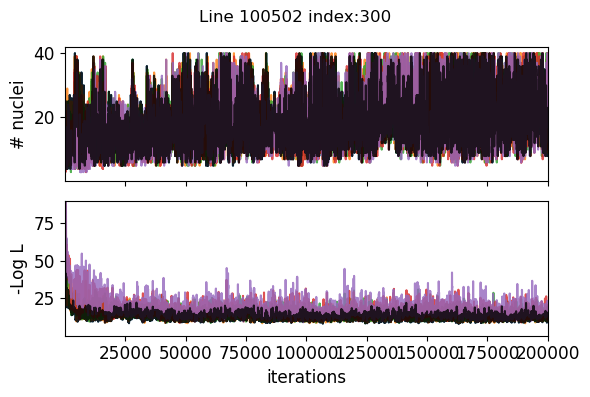

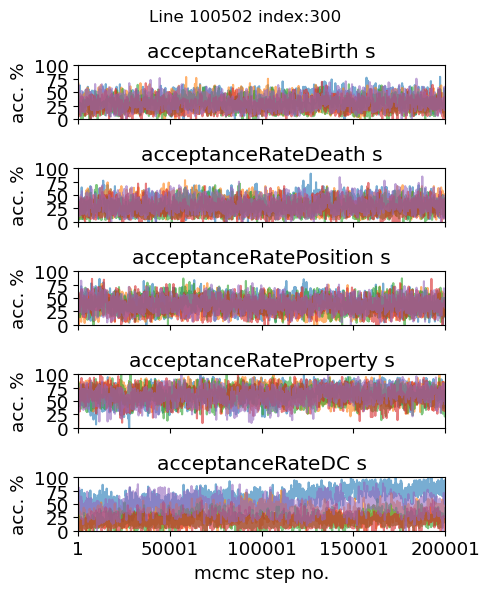

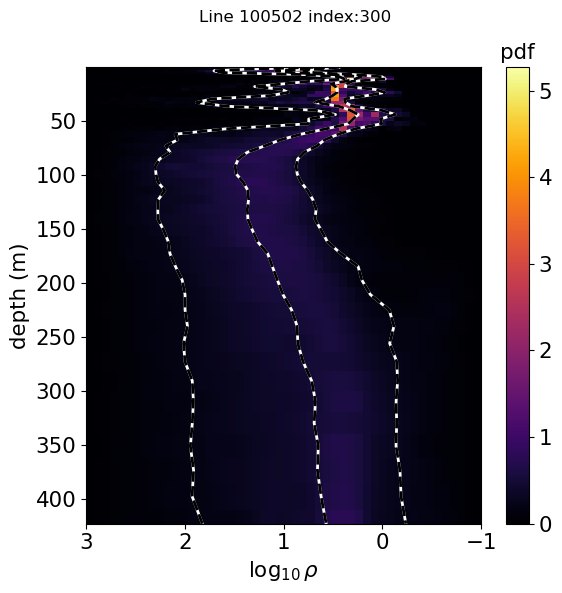

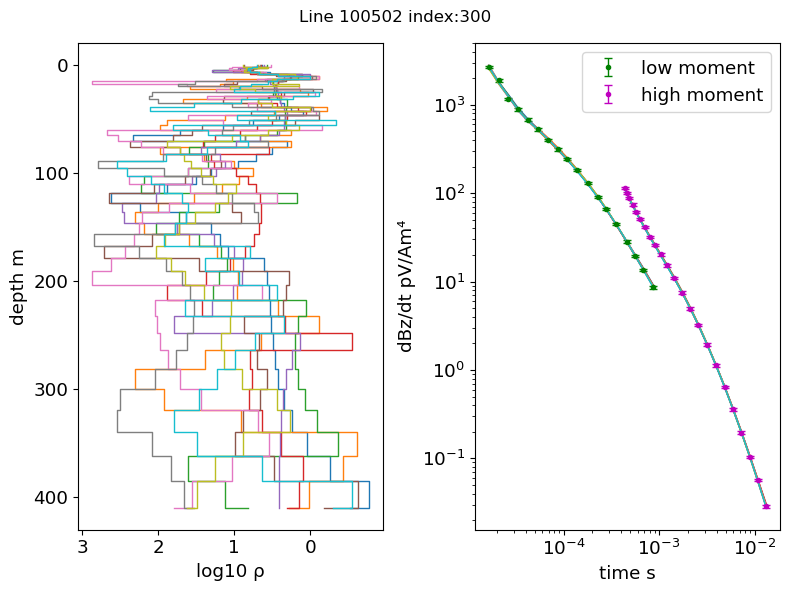

In [6]:
# Interpolation distance
dr = 6.25
# Array of lines wanted
lnames = [100401, 100502]
# Sounding index per line wanted
idx = [[200, 1700], [300]]
# how much to discard from McMC samples
burninfrac = 0.25
# quantiles wanted from posterior -- these have been prerun
qp1, qp2 = 0.1, 0.9
# limits in log10 conductivity for plot
vmin, vmax = -reverse(fbounds[:])
cd("/scratch/ns59/HiQGA.jl/ASEG_Hobart_Workshop_2024/UDF_probabilistic") # change to the directory with the files
# do it
transD_GP.summaryAEMimages(soundings, opt;yl=[-150,100],
    zall, dr, dz, cmap="turbo", burninfrac, figsize=(12,8), fontsize=18,
    vmin=vmin, vmax=vmax, lnames, idx, useML, qp1, qp2, dpi=400,
    preferEright=true, saveplot=false)
# a few individual soundings
transD_GP.plotindividualAEMsoundings(soundings, aem, opt, idx;
    burninfrac, nbins=50, computeforwards=true, zall, qp1, qp2,
    nforwards=10, usekde=true, lnames)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*